In [48]:
#importations des bibliothèques nécessaires
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
store = pd.read_csv("googleplaystore.csv") 

#Les 10 premières lignes du tableau
store.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [50]:
store1 = store[store["Rating"]<=5]

In [51]:
def get_reviews(reviews):
    if reviews.endswith('.0M'):
        reviews = reviews[:-3] + '000000'
        return int(reviews)
    else:
        return int(reviews)
store1['Reviews'] = store['Reviews'].apply(get_reviews)

<ipython-input-51-2ecc71fa201a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['Reviews'] = store['Reviews'].apply(get_reviews)


In [52]:
def get_size(size):
    if size == 'Varies with device':
        return 10
    elif size.endswith('M'):
        size = size[:-1]
        return float(size)
store1['Size'] = store['Size'].apply(get_size)

<ipython-input-52-ef28d432ec86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['Size'] = store['Size'].apply(get_size)


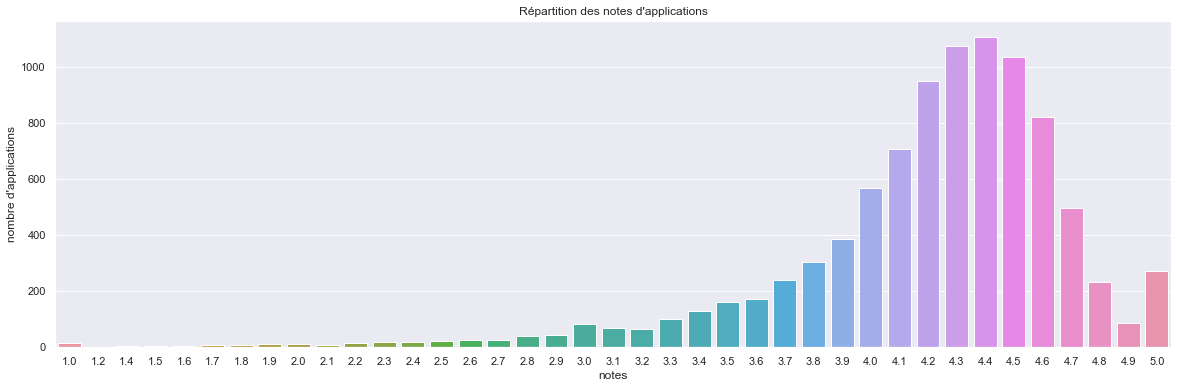

In [53]:

plt.figure(figsize=(20,6))
sns.countplot(x='Rating',data=store1)
plt.xlabel('notes')
plt.ylabel("nombre d'applications")
plt.title("Répartition des notes d'applications")

plt.show()

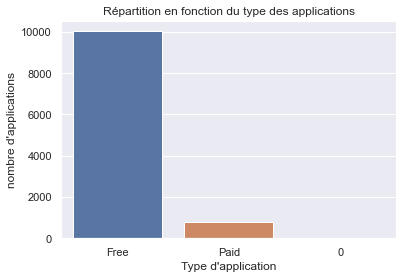

In [54]:
sns.countplot(x='Type',data=store)
plt.xlabel("Type d'application")
plt.ylabel("nombre d'applications")
plt.title("Répartition en fonction du type des applications")

plt.show()

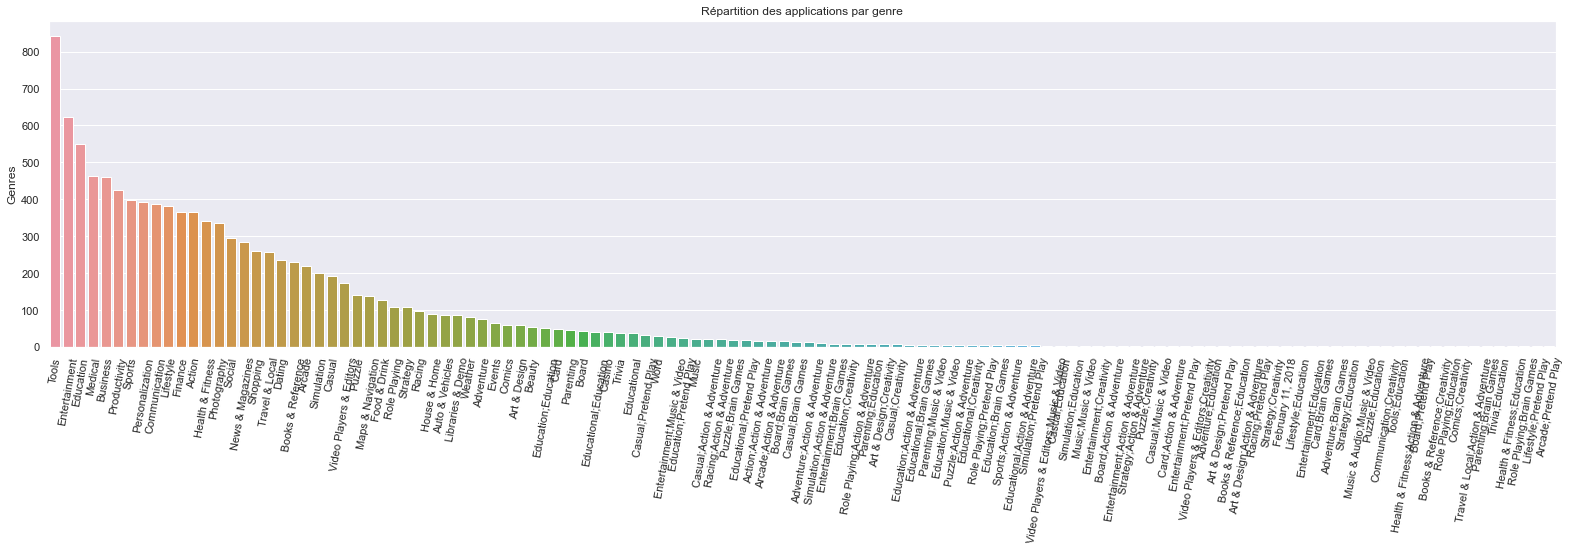

In [55]:
plt.figure(figsize=(27,6))
sns.barplot(x=store.Genres.value_counts().index,y=store.Genres.value_counts())
plt.xticks(rotation=80)
plt.title("Répartition des applications par genre")
plt.show()

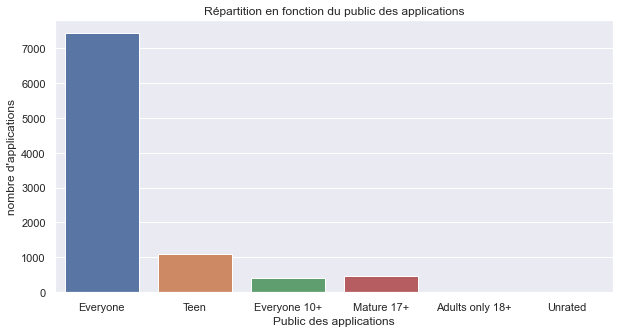

In [61]:
ax = plt.figure(figsize=(10,5))
sns.countplot(x='Content Rating',data=store1)
plt.xlabel("Public des applications")
plt.ylabel("nombre d'applications")
plt.title("Répartition en fonction du public des applications")


plt.show()

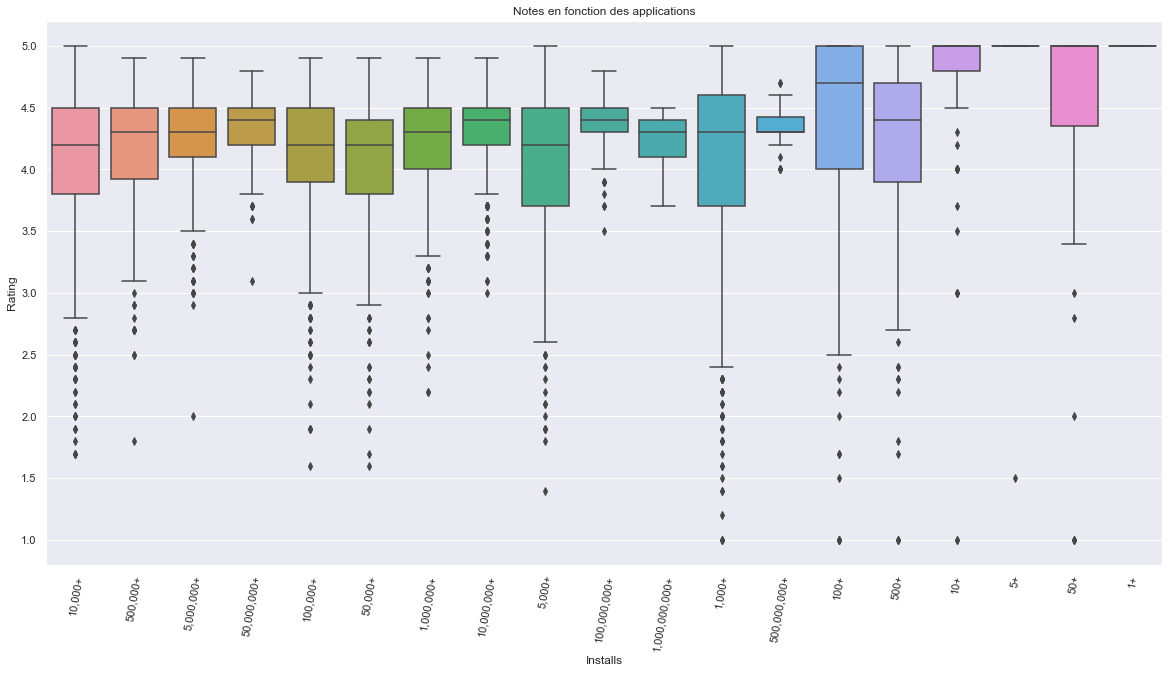

In [58]:

ax = plt.figure(figsize=(20,10))
sns.set()
sns.boxplot(x="Installs", y="Rating", data=store1)
plt.title("Notes en fonction des applications")
plt.xticks(rotation=80)
plt.show()

In [59]:
store1.Price=store1.Price.map(lambda x:x.replace('$',''))
store1.Price=store1.Price.astype('float')

C:\Users\Utilisateur\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


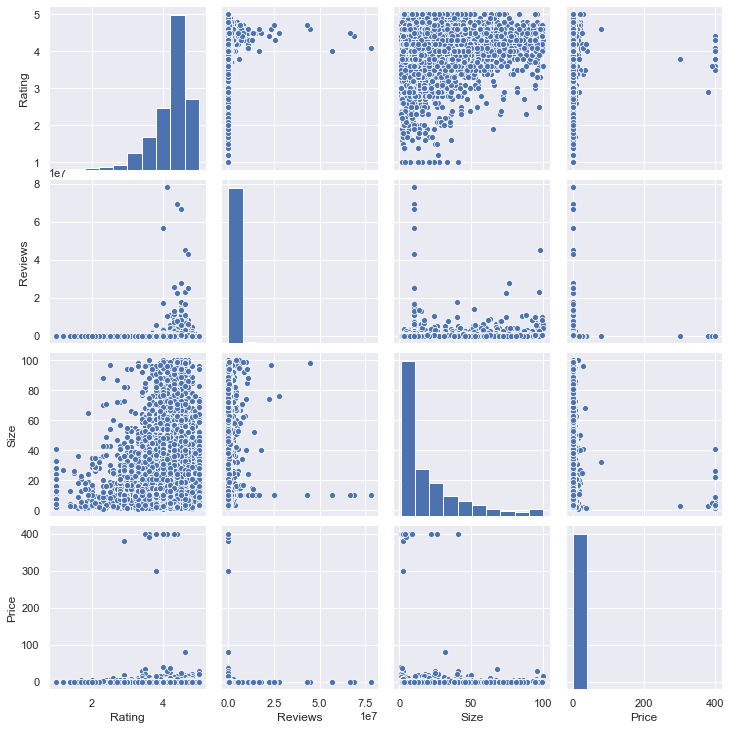

In [60]:
sns.pairplot(data=store1)
plt.show()